

# The SIR model

# What you will learn

**Preamble**: 
Imagine a new virus emerges in your community. At first, only a few people are infected but soon hospitals in your city begin to fill up.

You are asked a critical question: Can we predict when this outbreak will be at it’s peak, how many people will get infected, and what interventions could stop it?
Did you know that ordinary differential equations (ODEs) are not abstract math but a tool for saving lives in a case like this?

These questions can be answered using the SIR model. The Susceptible Infected Recovered (SIR) model can be described using three differential equations. 

`But, can these ordinary differential equations really describe the story of an outbreak from start to end?`

In the first video, Patience answers this question as she takes us through the mathematical foundations of the SIR model often referred to as `The Math of Epidemics`.

She explains the total population(N) which consists of 3 populations of individuals often referred to as compartments of the SIR model. The susceptible(S) individuals who are at an increased risk of infection and may require interventions such as vaccination or chemoprophylaxis, social distancing etc. to prevent diseases. They do not have the virus but could catch it. The Infected/Infectious(I) people who have the virus and can spread it to those who are susceptible and the Recovered(R) people who have had the virus, have recovered, and can no longer spread the virus.

She also explains two key variables; β which is the disease transmission rate and γ which is the recovery rate

## Assumptions of the SIR Model

**The SIR model operates on 4 assumptions**: 

1.      The total population N is constant in time i.e No births, deaths or migration

2.      There is a homogeneous mixing of the infected and susceptible populations

3.      Individuals who recover from the disease gain permanent immunity

4.      Both the rate of Infection and the rate of recovery are constant

# Deriving the differential equations by hand

PATIENCE'S VIDEO HERE

## The 3 differential Equations

In the SIR model, the rate of change of susceptible individuals is

\begin{align}:label: susc\end{align}
 
   \frac{dS}{dt} = -\beta S I 

and the rate of change of infectives is 

\begin{align}:label: infect\end{align}
 
   \frac{dI}{dt} = \beta S I - \gamma I

The constant $\beta$ is the rate of contact between people and $\gamma$ is the rate of recovery.
We can also write down an equation for recovery as follows,

\begin{align}:label: recover\end{align}
 
   \frac{dR}{dt} = \gamma I

In this model $S$, $I$ and $R$ are proportions of the population. Summing them up gives $S+I+R=1$, since 
everyone in the popultaion is either susceptible, infective or recovered.

While it is very important to understand this math, python makes it easier for us to solve these equations by importing key python libraries without having to manually do these calculations.

Let’s now solve these equations numerically in python. We start by importing the libraries we need from Python.

# Doing it numerically in python


In [90]:
import numpy as np
import panel as pn
pn.extension()   

import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
from scipy.integrate import odeint

matplotlib.font_manager.FontProperties(family='Helvetica', size=11)
rcParams['figure.figsize'] = 9/2.54, 9/2.54

Now we define the model. This code creates a function 
which we can use to simulate differential equations :eq:`susc` and :eq:`infect`. 
We also define the parameter values β (the infection rate) and γ (the recovery rate. 
You can change these to see how
changes to the paramaters leads to changes in the outcome of the model. 

Investigate yourself what happens when you change the values of β$β=1/3, 1/6, 1/10$.



In [92]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

Let's now solve these equations numerically and plot the solution over time. 
You can change β to see how changes to the parameters leads to changes in the epidemic curve. 
Let’s try it here by changing β values and observe the changes over time.



In [94]:
#Plotting the solution over time
#-------------------------------

def plot_sir(beta):
    if pn.state.curdoc is None:
        return None  # prevents Sphinx double-render
    gamma = 1/7  
    t = np.linspace(0, 100, 1000)
    y0 = [0.9999, 0.0001, 0.0]
    sol = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = sol.T
    
    plt.close()
    fig = plt.figure()
    plt.plot(t, S, '--', label='Susceptible')
    plt.plot(t, I, '-', label='Infectives')
    plt.plot(t, R, ':', label='Recovered')

    plt.xlabel("Time")
    plt.ylabel("Proportion")
    plt.title(f"SIR Model (β={beta:.2f}, γ=1/7)")
    plt.legend()
    plt.grid(True)
    return fig

slider = pn.widgets.FloatSlider(
    name='β (transmission rate)',
    start=0.05, end=1.0, step=0.05, value=0.5
)

interactive_plot = pn.bind(plot_sir, beta=slider)

pn.Column(
    "# SIR Model Epidemic Curve",
    slider,
    interactive_plot
).servable()

Column
    [0] Markdown(str)
    [1] FloatSlider(name='β (transmission rate)', start=0.05, step=0.05, value=0.5)
    [2] ParamFunction(function, _pane=Str, defer_load=False)

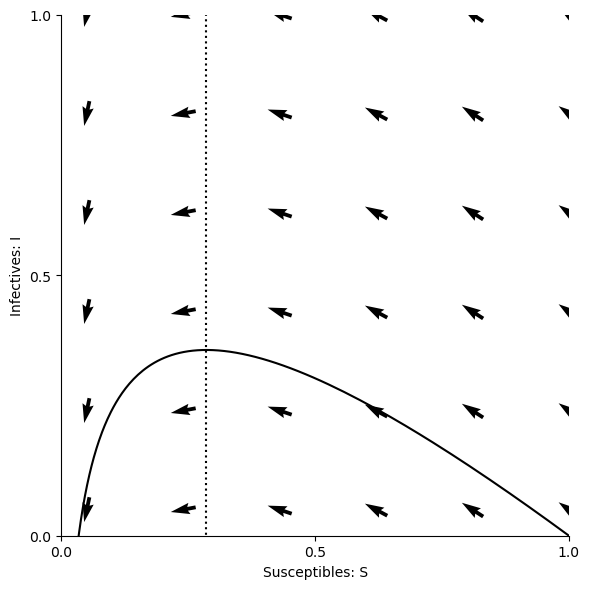

In [95]:
"""

Phase Planes and nullclines
===========================

In this section, Emily introduces the concept of **phase planes and nullclines** in the video below, 
using the SIR model as an example.

.. youtube:: oYcNqe9KlDk
    :width: 100%
     :align: center

The material that follows recaps what is covered in the video, with supporting code 
and explanations to help you explore phase planes for yourself.

"""

# What are Phase Planes, and Why Do We Use Them?
# ---------------------------------------------
# A phase plane is a graphical representation of a dynamical system i.e a system described by 
# differential equations where we plot one variable against another instead of plotting them over time.
# Phase planes provide a powerful visualization method for dynamic systems.
#
#Why a dynamic system?
# --------------------
# In mathematics and epidemiology, a system means a set of linked equations that describe how 
# variables change over time. So the SIR model is a dynamic system because the numbers of S,I and 
# R are continuously changing as the epidemic evolves i.e When there are many susceptibles and 
# few infected, the rate of infection is high, as susceptibles decrease, the rate of infection slows down 
# and when almost everyone is recovered, the infection fades away. The trajectory of the epidemic 
# (rise, peak, decline) is a dynamic response to how the parts of the system interact over time
# Instead of observing each variable separately over time, phase planes plot one variable
# against another. In our case, a common representation for the SIR model is the interaction 
# between the Susceptible (S) and Infected (I) groups. This is used both in in Emily's video, and
# further below in the code examples.
# 
# This visualization allows us to better understand complex system behaviors, such as:
# 
# 1. The spread of disease over time
# 
# 2. Stabilization points (equilibrium)
# 
# 3. The eventual decline or extinction of an epidemic
#
# Phase planes highlight crucial relationships, equilibrium points, and system behavior
# that can inform predictions about the long-term outcomes of an epidemic.
#
# Key Components of Phase Planes
# ------------------------------
# To fully understand phase planes, let’s examine their key components:
#
# **Axes**:
#     The axes of a phase plane represent the system variables, which is Susceptible (S) and Infected (I) in this case.
#     By plotting one variable against another, we can see how these groups interact directly, rather than just observing 
#     their individual changes over time.
#
# **Trajectories**:
#     Trajectories portray the state of the system as it evolves. 
#     For the SIR model in particular, the trajectory describes how the numbers of susceptible and infected individuals change in relation 
#     to one another as the epidemic progresses over time.
#
# **Directional Arrows**:
#     These arrows on the phase plane indicate the direction of movement over time, showing how the system transitions between states.
#     They guide us through the epidemic's progression, pointing from higher susceptibility toward states of greater infection or recovery.
#
# Below is the first example of a phase plane showing how the SIR system evolves over time, 
# with Susceptible (S) on the x-axis and Infected (I) on the y-axis. 


beta = 1/2
gamma = 1/7

def _dXdt_for_phase(X, t=0, beta_val=beta, gamma_val=gamma):
    S, I, R = X
    dSdt = -beta_val * S * I
    dIdt = beta_val * S * I - gamma_val * I
    dRdt = gamma_val * I
    return [dSdt, dIdt, dRdt]

def plotPhasePlane(ax, Svals, Ivals):
    ax.plot(Svals, Ivals, '-', color='k')
    ax.set_xlabel('Susceptibles: S')
    ax.set_ylabel('Infectives: I')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(np.arange(0, 1.01, step=0.5))
    ax.set_yticks(np.arange(0, 1.01, step=0.5))
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)

def drawArrows(ax, beta_val=beta, gamma_val=gamma):
    x = np.linspace(0.05, 1, 6)
    y = np.linspace(0.05, 1, 6)
    Xgrid, Ygrid = np.meshgrid(x, y)
    # Vector field components on the grid:
    dS = -beta_val * Xgrid * Ygrid
    dI = beta_val * Xgrid * Ygrid - gamma_val * Ygrid
    M = np.hypot(dS, dI)
    M[M == 0] = 1.0          
    dSu = dS / M
    dIu = dI / M
    ax.quiver(Xgrid, Ygrid, dSu, dIu, pivot='mid', scale=20)


t_phase = np.linspace(0, 160, 800)
X0_phase = np.array([0.9999, 0.0001, 0.0])

X_phase = odeint(_dXdt_for_phase, X0_phase, t_phase)
S_phase, I_phase, R_phase = X_phase.T

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
plotPhasePlane(ax, S_phase, I_phase)
drawArrows(ax, beta_val=beta, gamma_val=gamma)

# Nullcline (vertical line at S = gamma/beta)
ax.plot([gamma / beta, gamma / beta], [-1, 2], linestyle=':', color='k', label=r'I-nullcline ($S=\gamma/\beta$)')

plt.tight_layout()
plt.show()

Equilibrium Points and Nullclines
 ---------------------------------
 One essential element of phase planes is the determination of equilibrium points. These 
 points occur where the rates of change for both Susceptible (S) and Infected (I) are zero. 
 The lines where the rate of change of a variable is equal to zero are called **nullclines**.
 The intersection of these nullclines determines the equilibrium points, which are 
 crucial to understanding how an epidemic evolves. 
 As the system evolves, either the susceptibles (S) becomes zero or the Infected(I) become zero and 
 the point at which they intersect where S=0 (vertical axis) and I=0(horizontal axis) is the 
 equilibrium. This is the **S-nullcline**. 
 The **I-nullcline** is where I=0 or βS- γ = 0 and if we make S the subject, then S=γ/β
 So the I-nullclines are I=0(horizontal axis) and S=γ/β (vertical axis)

 S=γ/β  is very important because it represents the threshold for the outbreak.
 **This is also referred to as the R_o** (basic reproductive number/ratio). 

 Similar to the `predator prey model<rabbitsandfoxes>`, we can find the equilibria for the infected population, where the rate at which 
 people become infected equals the rate at which they recover. This is done by solving:

 .. math::
    \frac{dI}{dt} = \beta S I - \gamma I = 0

 This occurs either when $I=0$ (no one has the disease) or 
 when $S=\gamma/\beta$.

 For the susceptible population:

 .. math::
    \frac{dS}{dt} = -\beta S I = 0

 which simplifies to $I = 0$ or $S = 0$. These resultant values are all nullclines
 of this system.

 We can now plot the nullcline $S=\gamma/\beta$ on the phase plane:

Plot the nullcline
 -----------------



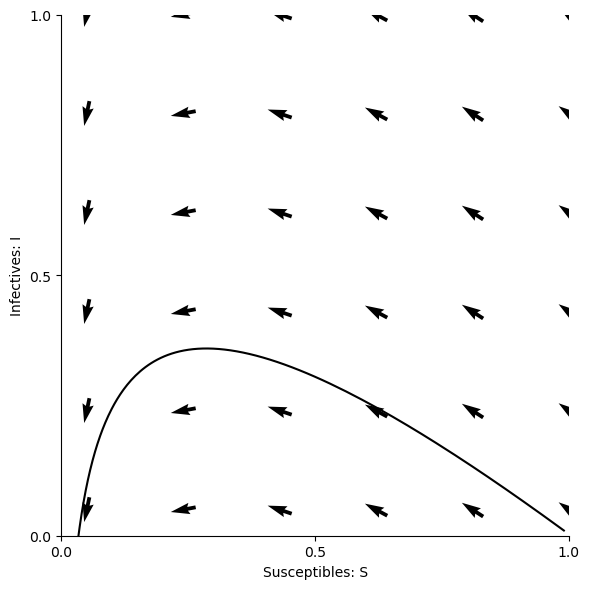

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
beta = 1/2
gamma = 1/7

def dXdt(X, t=0):
    S, I, R = X
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Integrate the system
X0 = np.array([0.99, 0.01, 0.0])
t = np.linspace(0, 160, 800)
X = odeint(dXdt, X0, t)
S, I, R = X.T

fig,ax=plt.subplots(figsize=(6,6))
plotPhasePlane(ax,S,I)
drawArrows(ax, beta_val=beta, gamma_val=gamma)
plt.tight_layout()
plt.show()

Now, we can see that this nullcline passes through the trajectory at its peak. 
This is because the rate of change of infections ($\frac{dI}{dt}$) becomes zero when $S=\gamma/\beta$, 
and the number of infected individuals reaches the maximum value possible for the system. 
This visual insight helps us understand how the number of infections evolves over time, 
and the nullclines highlight important thresholds in disease spread.
The effects of interventions, such as vaccination or changes in contact rates can also be
visualised in this way, by showing how they might shift the trajectory or alter the nullclines.

## Impact of Parameters
Now, we can investigate what happens to the phase planes when we change the
values of $\beta$ and $\gamma$. In our previous code examples, the
$\beta$ value was $\frac{1}{2}$, which is the rate of contact between people,
or transmission rate. What do you think will happen to the phase plane trajectory 
if we increase this value? How will the nullcline be impacted?
You can change the "beta" value in the code block to test your hypothesis.

Answer:



.. toggle:: Click to expand explanation

   As $\beta$ increases, the infection rate becomes faster, which means the disease 
   spreads more quickly. This leads to a faster rise in the number of infected individuals, 
   and the trajectory in the phase plane will become steeper. The peak of the trajectory will 
   also become higher, as more individuals get infected more quickly before reaching the recovery phase.

   The nullcline, which represents the point where the rate of change of infected individuals is zero 
   (i.e., where the number of infections and recoveries are balanced), shifts to the left as 
   $\beta$ increases. This indicates that, for a higher transmission rate, fewer susceptible 
   individuals remain in the population when the epidemic reaches equilibrium. Essentially, a larger 
   number of people are infected earlier, so there are fewer susceptible individuals left when the 
   system reaches a stable state.



Similarly, the $\gamma$ value was set to $\frac{1}{7}$, representing the recovery
rate. What happens to the trajectory and nullcline for the phase plane when this value 
is increased?

Answer:



.. toggle:: Click to expand explanation

   A flatter trajectory and a lower peak (due to quicker recovery) will be observed. In addition, the nullcline shifts to the right, 
   indicating a higher number of susceptible individuals at equilibrium. 

   This is because the quicker recovery of individuals causes the epidemic to peak and decline more quickly, 
   leaving a larger proportion of the population susceptible at the point of equilibrium.



# Additional questions:

1. When a high $\gamma$ or low $\beta$ value is used, the trajectory does not return to the x-axis after peaking. Why might this be happening?
2. We have been initialising the models with 99.99\% of the population as susceptible, and only 0.01\% infected. How are the phase planes affected when changing this proportion?
3. If we could reduce the Infection/transmission rate β (e.g., through social distancing or vaccination), what do you think will happen to the nullcline? Then how would the epidemic curve change? What if this value increases?
4. If we could increase recovery rate γ, how would the curve change?
5. If we reduced β while at the same time increasing γ how would that alter the shape of the epidemic curve?
6. How can we estimate how long it will take for the epidemic to be at its peak and how long it will stay at its peak? This question is answered using phase planes and nullclines in Emily’s video
7. How can the SIR model help governments decide when to lift restrictions?
8. Can you now be able to answer the question you were asked at the start i.e Can we predict when this outbreak will be at it’s peak, how many people will get infected, and what interventions could stop it?
